<h1 style = "font-size:50px; color: #9DC719;">Rental Bike Prediction</h1>

<html>
<p style="border:3px solid black;color:green;padding:10px;background-color:#E2FFF2;">
    <b style="color:Black;">Data Set Information:</b><br><br>
    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.<br><br>
    <b style="color:Black;">Attribute Information:</b><br><br>
    🔶 Date : year-month-day<br>
🔶 Rented Bike count - Count of bikes rented at each hour<br>
🔶 Hour - Hour of he day<br>
🔶 Temperature-Temperature in Celsius<br>
🔶 Humidity - %<br>
🔶 Windspeed - m/s<br>
🔶 Visibility - 10m<br>
🔶 Dew point temperature - Celsius<br>
🔶 Solar radiation - MJ/m2<br>
🔶 Rainfall - mm<br>
🔶 Snowfall - cm<br>
🔶 Seasons - Winter, Spring, Summer, Autumn<br>
🔶 Holiday - Holiday/No holiday<br>
🔶 Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)</p><br>
</html>

## Data Manipulation
### Importing required liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates=[0])

## Dataset View

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dataset Information
<p> Here we can observe diffrnt datatypes 
like int64,float64,object and datetime64 float object </p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [5]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [6]:
df.columns = df.columns.str.lower()

In [15]:
df = df.astype({'rented bike count':'float','hour':'object'})

<h2>Summary statistics</h2>
    <p><b>Brief Information of different descriptive statistics-</b></p>
    <p>
        <ul style="color:black;background-color:#E2FFF2; padding: 5px">
            <li>
                <b>measures of Frequency</b> : Count, percent, Frequency.
            </li>
            <li>
                <b>Measures of Central Tendency</b> : Mean, Median, and mode.
            </li>
            <li>
                <b>Measures of Dispersion or Variation</b> : Range(min,max),Variance, Standard Deviation.
            </li>
            <li>
                <b>Measures of Position</b> : Percentile Ranks, Quartile Ranks.
            </li>
        </ul>
    </p>

In [8]:
df.describe().style.background_gradient()

,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Checking for unique values in the dataset
<p style="background-color:#E2FFF2; padding: 10px">Different numbers of distint values in each attribute. and our target varibale is Rented bike count  <b>Rented bike count</b> attribute.</p>

In [10]:
df.nunique().sort_values(ascending = True)

holiday                     2
functioning day             2
seasons                     4
hour                       24
snowfall                   51
rainfall                   61
wind speed                 65
humidity                   90
radiation                 345
date                      365
temperature               546
dew point temperature     556
visibility               1789
rented bike count        2166
dtype: int64

## checking for missing values in each column
<p style = "background-color:#E2FFF2; padding: 10px;">No such missing values in our dataset.<br>
If you want to learn how to treat the missing values.Go through this link <a href = "https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/">Click Me</a>
    </p>

In [9]:
df.isnull().sum()

date                     0
rented bike count        0
hour                     0
temperature              0
humidity                 0
wind speed               0
visibility               0
dew point temperature    0
radiation                0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning day          0
dtype: int64

## Data visualization
<p style="background-color:#E2FFF2; padding: 10px;">Checking the data distribution of each Continuous variable</p>
<html>
<p style="font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="padding:10px;background-color:#E2FFF2;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
</html>

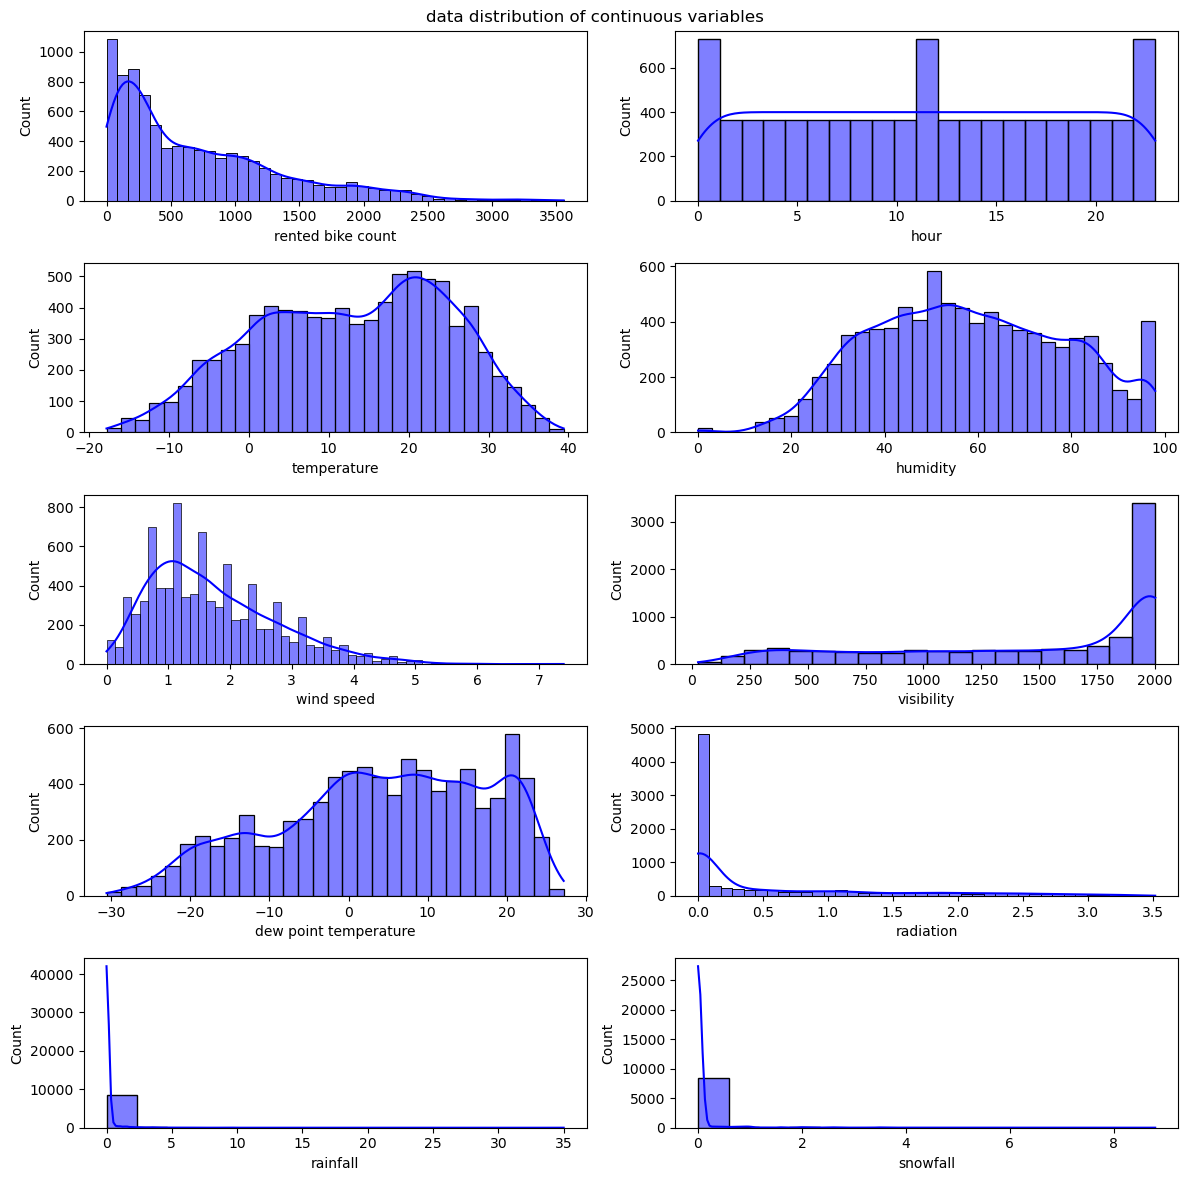

In [24]:
plt.figure(figsize= (12,12))
for i,col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = df, x = col, ax = ax, color = 'blue', kde = True)
plt.suptitle('data distribution of continuous variables')
plt.tight_layout()

<p style = "background-color:#E2FFF2; padding:10px;">from the above graph we can see that there are a lot of
attributes which are positively or negatively distrbuted.
    </p>

## Box Plot-

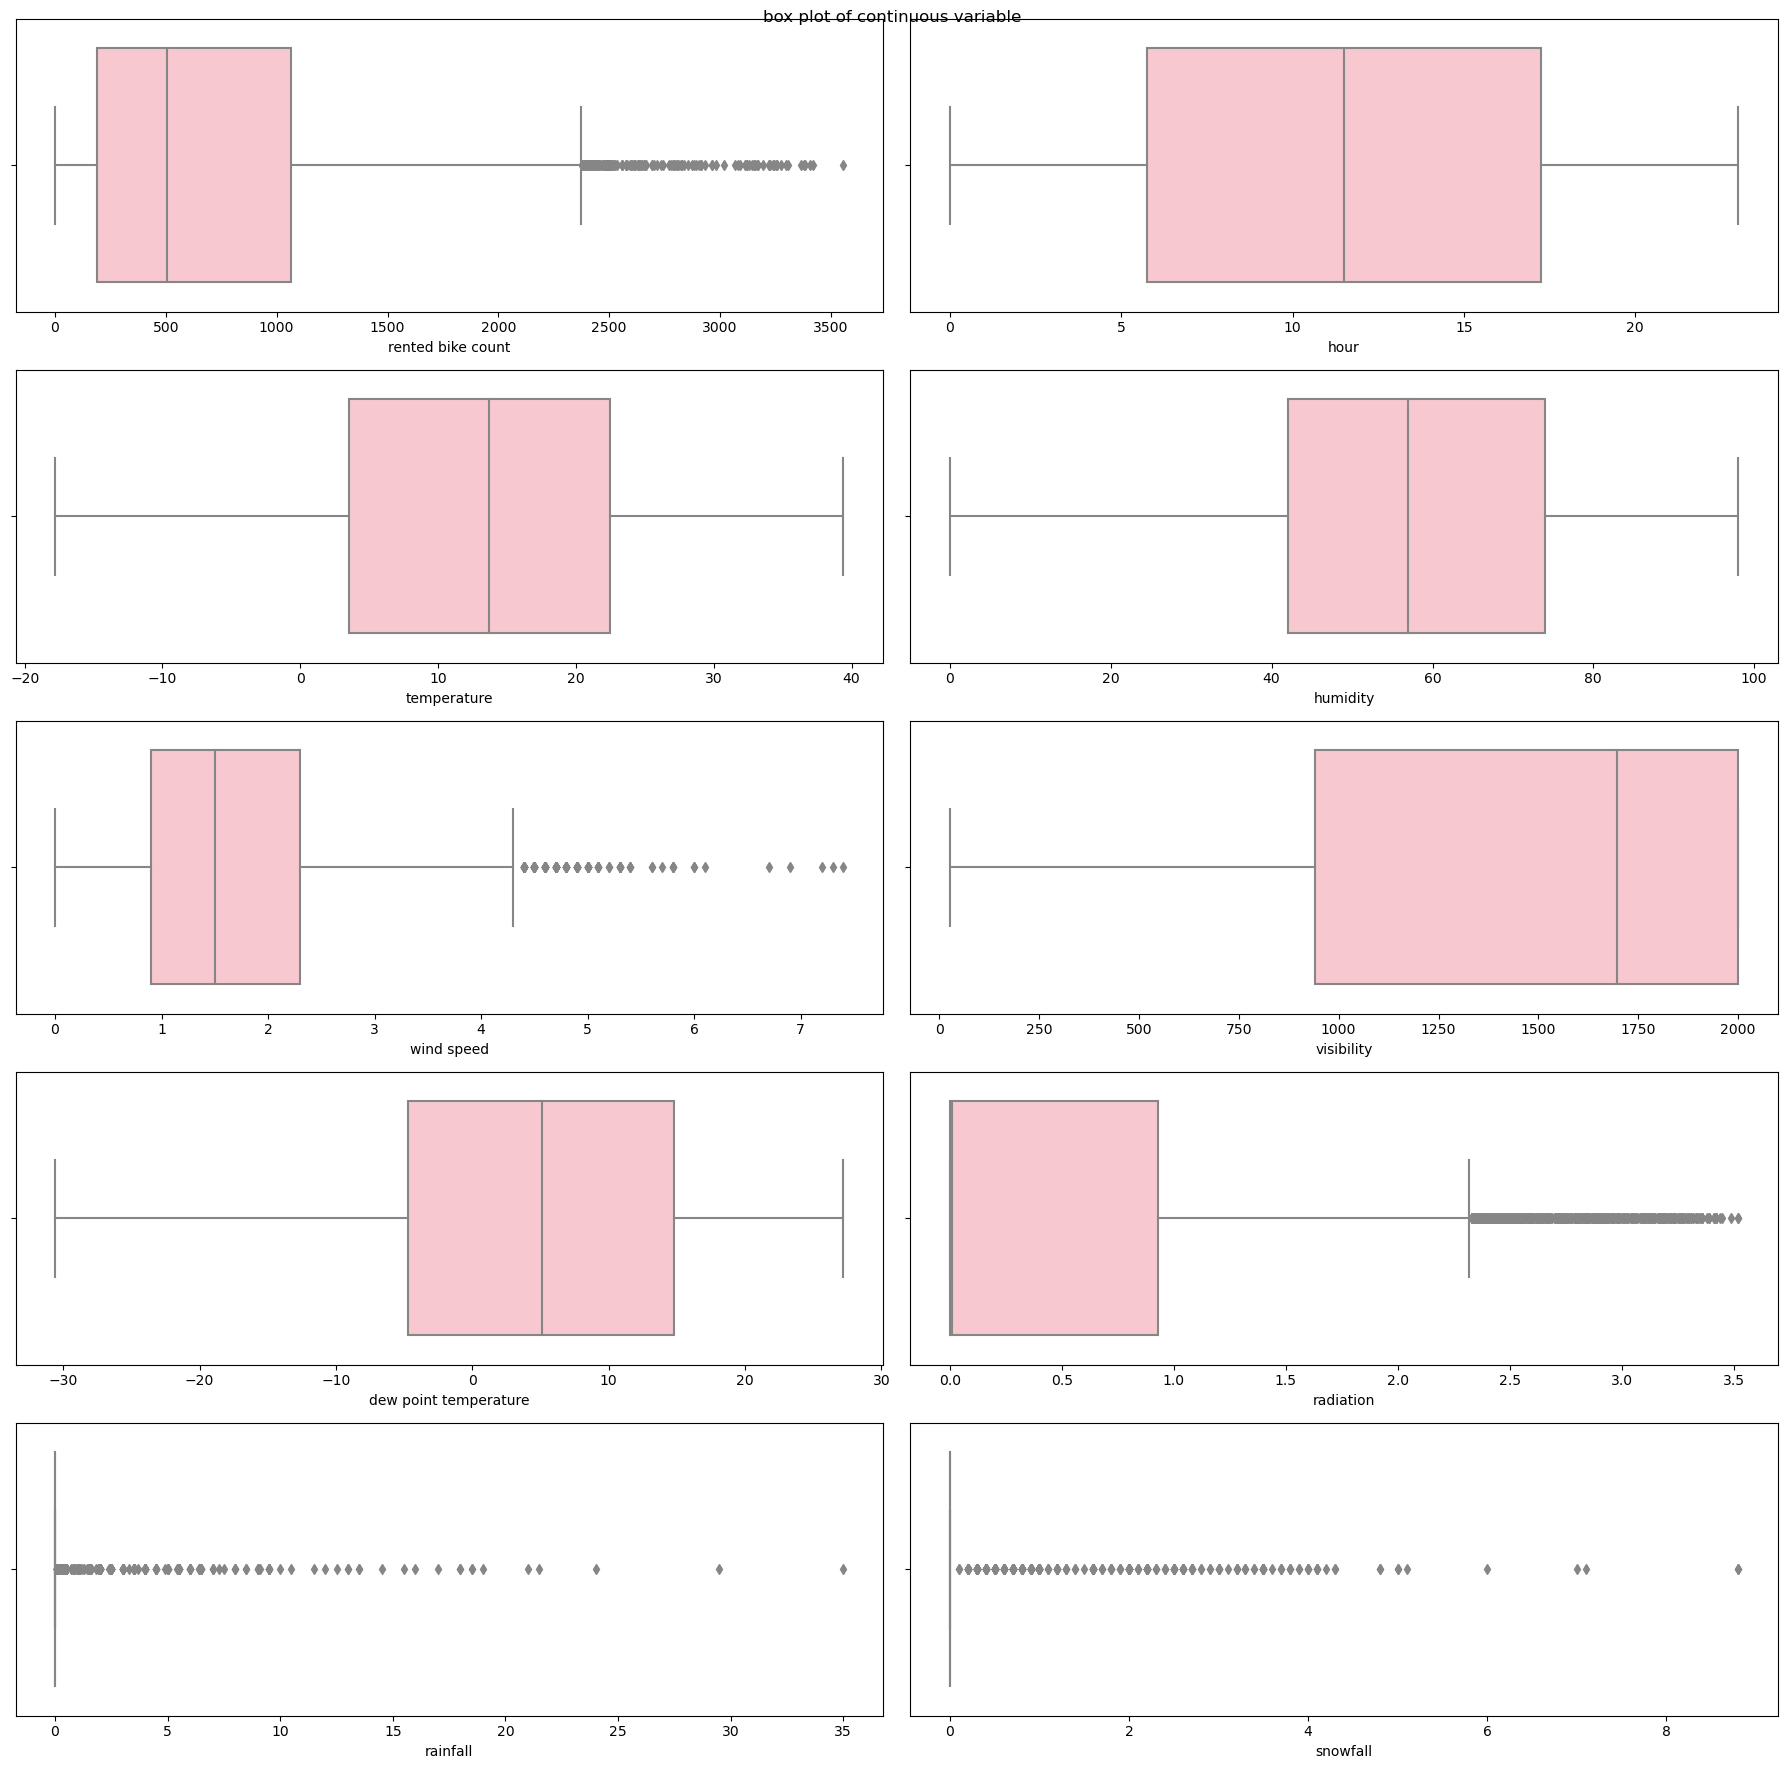

In [13]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data = df, x = col, ax = ax, color = 'pink')
plt.suptitle('box plot of continuous variable')
plt.tight_layout()

In [16]:
# selecting the variable that have data types float and Int.

num_var = list(df.select_dtypes(include = ['float64','int64']).columns)

## Now as we have selected the numerical columns,
## now we will apply transformation over these variables because they are not normally distributed

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
p_trans = PowerTransformer(method = 'yeo-johnson')
df[num_var] = p_trans.fit_transform(df[num_var])

## Data distribution after applying Power transformer

### Now the Distribution plots look more symmetrical after treating the outliers.

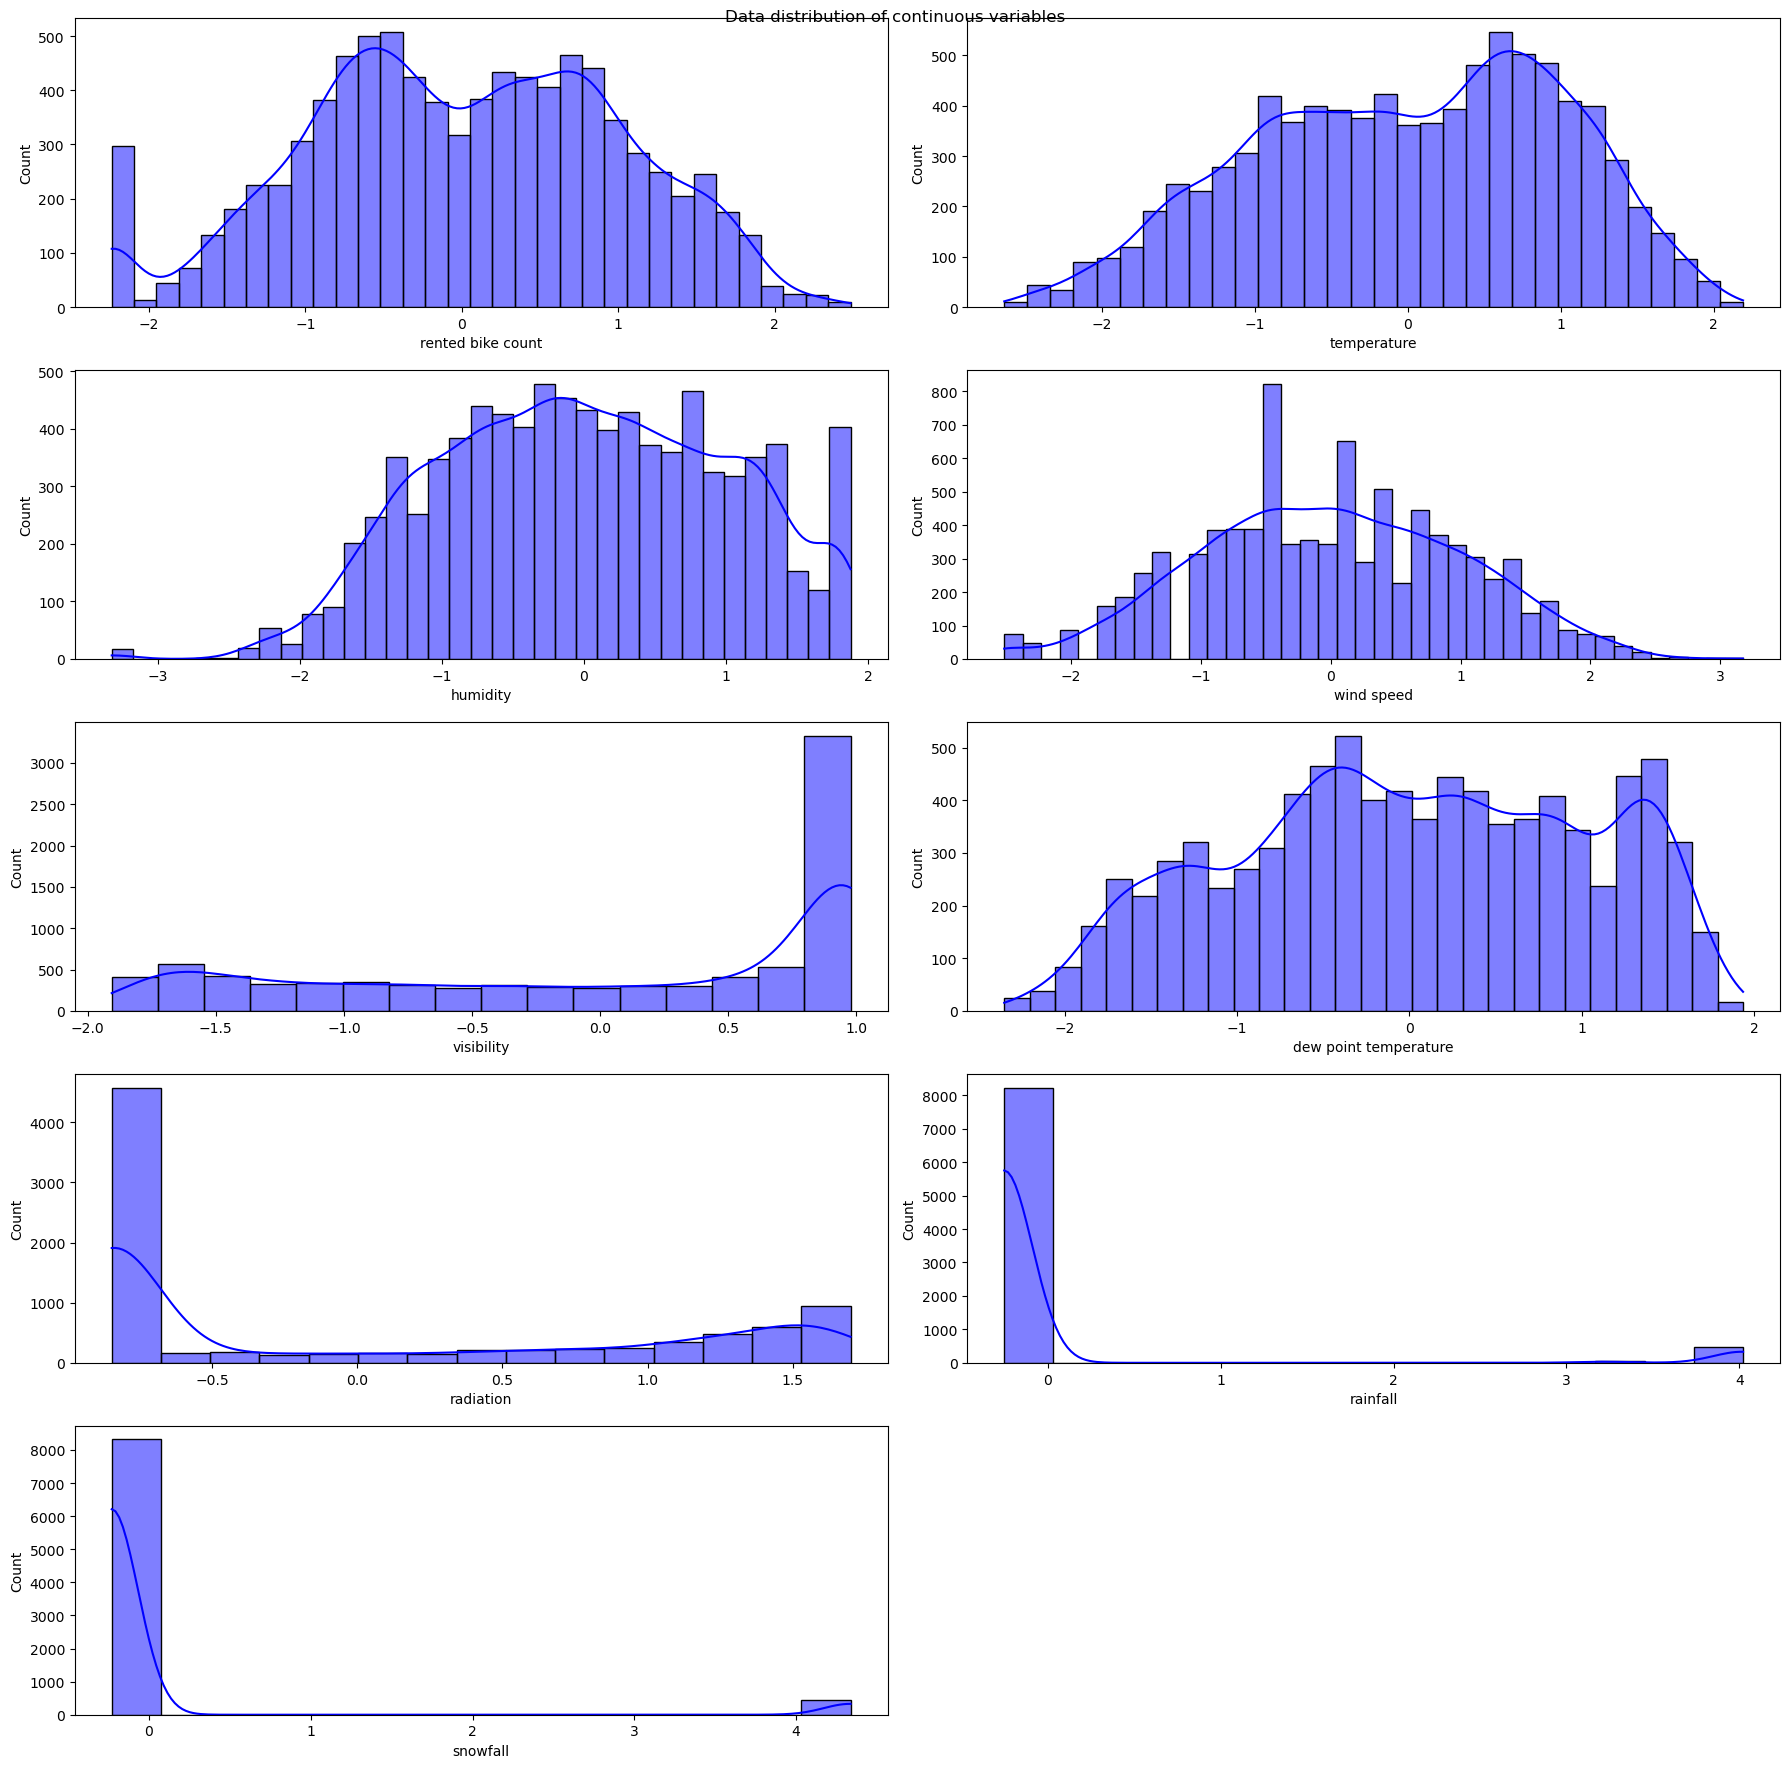

In [23]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = df, x = col, ax =ax, color = 'blue', kde = True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### box plot after applying power Transformer
### Now our Box plots look better agter treating the outliers.

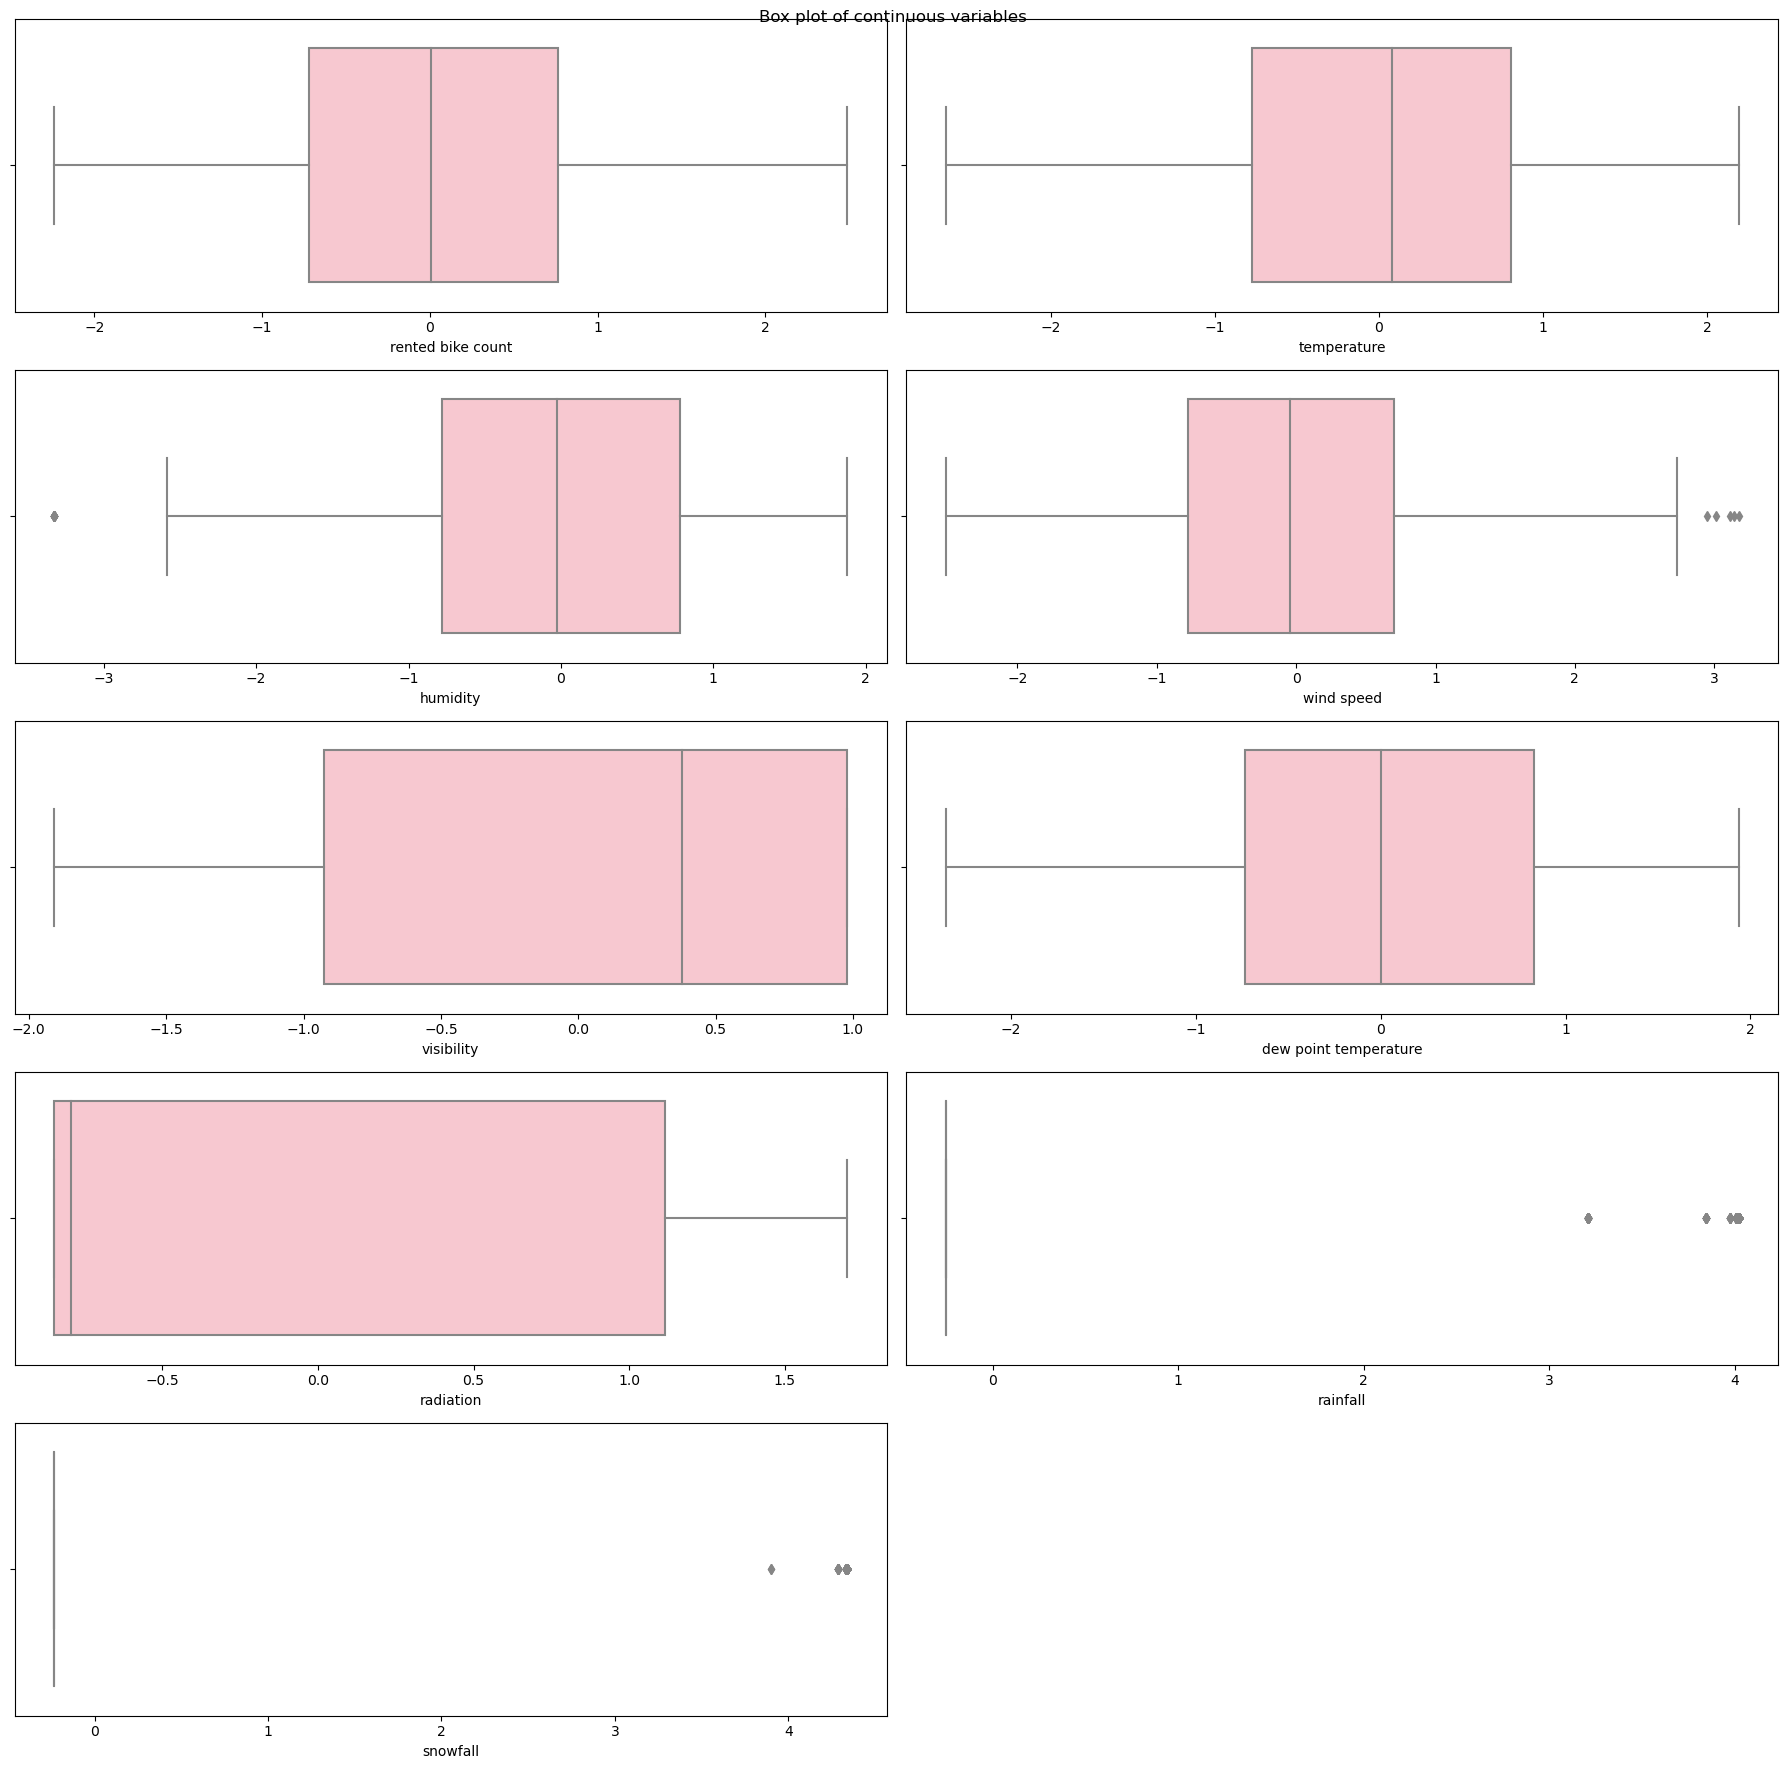

In [25]:
plt.figure(figsize = (18,18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data = df, x =col, ax = ax, color = 'pink')
plt.suptitle('Box plot of continuous variables')
plt.tight_layout()

# Heatmap

### with the help of heatmap we can find the multicolinearity between the variables of the dataset.

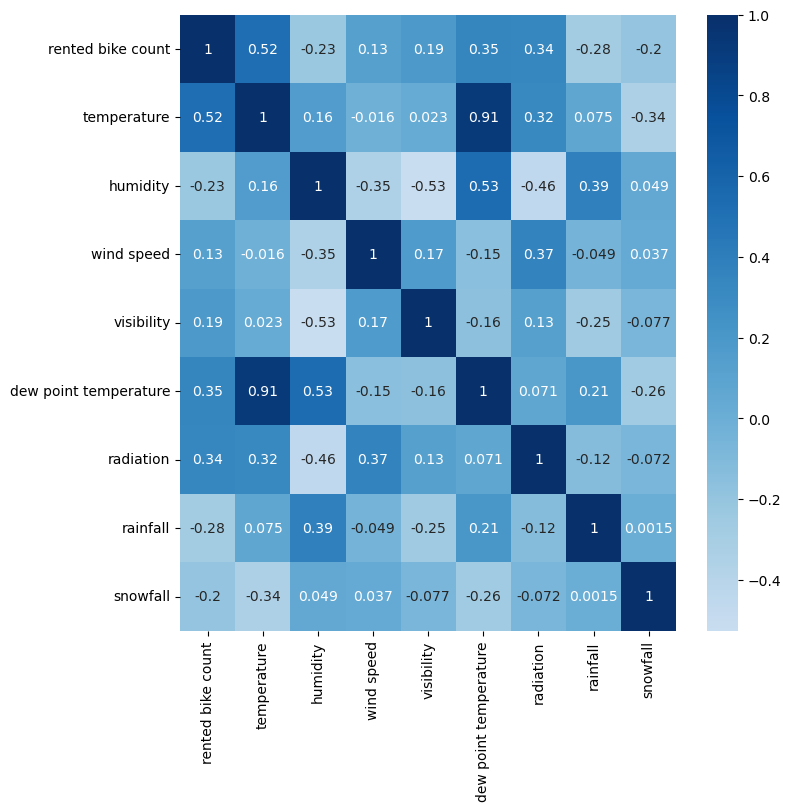

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(df[num_var].corr(), annot = True, cmap = 'Blues', center = 0)
plt.show()

### with the help of variance inflationn factor we can also find the correlation
### between the variables of the data set
A rule of thumb for interpreting the variance inflation factor:
👉 1 = not correlated.
👉 Between 1 and 5 = moderately correlated.
👉 Greater than 5 = highly correlated.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [34]:
calc_vif(df[num_var])

,variables,VIF
0,rented bike count,1.731683
1,temperature,47.196732
2,humidity,12.011760
3,wind speed,1.237722
4,visibility,1.560134
5,dew point temperature,60.543491
6,radiation,1.858374
7,rainfall,1.298203
8,snowfall,1.166784


In [36]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
num_var.remove('dew point temperature')

In [37]:
calc_vif(df[num_var])

,variables,VIF
0,rented bike count,1.723978
1,temperature,2.111455
2,humidity,2.503773
3,wind speed,1.237471
4,visibility,1.496195
5,radiation,1.827975
6,rainfall,1.296638
7,snowfall,1.162325


In [38]:
# Now we will take out the features and the target in a seperate variables X and y

X = df.iloc[:,2:]
y = df.iloc[:,1]

In [42]:
del X['dew point temperature'] #this feature is highly correlated

,hour,temperature,humidity,wind speed,visibility,radiation,rainfall,snowfall,seasons,holiday,functioning day
0,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes
1,1,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes
2,2,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes
3,3,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes
4,4,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes
